<a href="https://colab.research.google.com/github/iqranaz240/8-Ball-Magic-Flutter-App/blob/master/QKD_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
from math import e
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

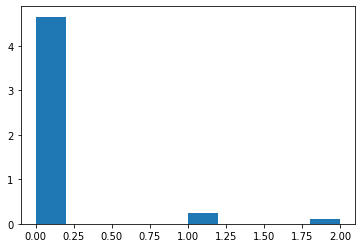

In [2]:
s = np.random.poisson(0.1, 100)
count, bins, ignored = plt.hist(s, 10, density=True)
plt.show()

In [3]:
print(s)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [16]:
class Photon:

  def __init__(self, polarization, intensity, energy, frequency):
    self.intensity = intensity
    self.energy = energy
    self.frequency = frequency
        
  def polarization(self, theta, phi):
    self.theta = theta
    self.phi = phi
    polarize_photon = np.array([math.cos(theta/2), (e**((0+1j)*phi))*math.sin(theta/2)])
    return polarize_photon

  def generate_photon(self, iterations):
    for iteration in range(iterations):
      if (s[iteration] == 2):
        return self.polarization(0,0)  #call photon constructor twice
        iteration+=1
      elif (s[iteration] == 1):
        return self.polarization(0,0)  #call photon construstor
        iteration+=1
    else:
        iteration+=1

In [17]:
p = Photon(1,2,3,4)
p.generate_photon(100)

        

array([1.+0.j, 0.+0.j])

In [ ]:
class Optical_Fibre:
  def __init__(self, attenuation_costant, length_of_fiber, Photon ):
    self.length_of_fiber = length_of_fiber
    self.attenuation_costant = attenuation_costant
    self.dispersion_coefficient = dispersion_coefficient
    self.spectral_width = spectral_width

    def attenuation(self):
        attenuation_of_fiber = attenuation_costant*length_of_fiber
        return attenuation_of_fiber

    def transfer_efficiency(self):
        x = (attenuation_costant*length_of_fiber)/10
        exponent = -(x)
        efficiency = np.power(10, exponent)
        return efficiency

    def intramodal_dispersion(self):
         chromatic_dispersion = dispersion_coefficient*length_of_fiber*spectral_width
         return chromatic_dispersion


In [107]:
class Alice_Encoding(Photon):
  def __init__(self, bits):
    self.bits = bits
    self.a_bits = None
    self.a_basis = None
    self.a_encoded_photons = None
    self.a_encoded_polarized_photons = None

  def alice_bits_basis_generation(self):
    x = random.choice([0, 1], size=(1, self.bits))
    self.a_bits = x[0]
    y = random.choice(['e', 'f'], size=(1, self.bits))
    self.a_basis = y[0]
    return self.a_bits, self.a_basis

  def alice_photons(self):
    self.a_encoded_photons = []
    self.alice_bits_basis_generation()
    for bit in range(len(self.a_bits)):
      if self.a_bits[bit] == 0:
       if self.a_basis[bit] == 'e':
        self.a_encoded_photons.append('e1')
        #print('e1')
        bit+=1
       else:
         self.a_encoded_photons.append('f1')
        #print('f1')
         bit+=1

      elif self.a_bits[bit] == 1:
        if self.a_basis[bit] == 'e':
         self.a_encoded_photons.append('e2')
         #print('e2')
         bit+=1
        else:
          self.a_encoded_photons.append('f2')
          #print('f2')
          bit+=1
    return self.a_encoded_photons

  def alice_encoded_photons(self):
    self.a_encoded_polarized_photons = []
    for bit in range(len(self.a_bits)):
      if self.a_encoded_photons[bit] == 'e1':
        pol = self.polarization(0,0)
        self.a_encoded_polarized_photons.append(pol)
        bit+=1

      elif self.a_encoded_photons[bit] == 'e2':
        pol = self.polarization(180,0)
        self.a_encoded_polarized_photons.append(pol)
        bit+=1

      elif self.a_encoded_photons[bit] == 'f1':
        pol = self.polarization(90,0)
        self.a_encoded_polarized_photons.append(pol)
        bit+=1    

      elif self.a_encoded_photons[bit] == 'f2':
        pol = self.polarization(90,180)
        self.a_encoded_polarized_photons.append(pol)
        bit+=1
    
    return self.a_encoded_polarized_photons


In [108]:
a = Alice_Encoding(16)
a.alice_bits_basis_generation()

(array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array(['e', 'e', 'e', 'e', 'f', 'f', 'f', 'e', 'f', 'e', 'f', 'e', 'e',
        'f', 'f', 'e'], dtype='<U1'))

In [109]:
a.alice_photons()

['f2',
 'e2',
 'e1',
 'e2',
 'e1',
 'f1',
 'f1',
 'e2',
 'f1',
 'f1',
 'e1',
 'f1',
 'e2',
 'e1',
 'e1',
 'f1']

In [110]:
a.alice_encoded_photons()

[array([ 0.52532199+0.j       , -0.50923178-0.6817036j]),
 array([-0.44807362+0.j,  0.89399666+0.j]),
 array([1.+0.j, 0.+0.j]),
 array([-0.44807362+0.j,  0.89399666+0.j]),
 array([1.+0.j, 0.+0.j]),
 array([0.52532199+0.j, 0.85090352+0.j]),
 array([0.52532199+0.j, 0.85090352+0.j]),
 array([-0.44807362+0.j,  0.89399666+0.j]),
 array([0.52532199+0.j, 0.85090352+0.j]),
 array([0.52532199+0.j, 0.85090352+0.j]),
 array([1.+0.j, 0.+0.j]),
 array([0.52532199+0.j, 0.85090352+0.j]),
 array([-0.44807362+0.j,  0.89399666+0.j]),
 array([1.+0.j, 0.+0.j]),
 array([1.+0.j, 0.+0.j]),
 array([0.52532199+0.j, 0.85090352+0.j])]

In [ ]:
class Bob_Encoding:
  
  def b_encoding():

    a = random.choice([0, 1], size=(1, 16))
    b_bits = a[0]

    b = random.choice(['e', 'f'], size=(1, 16))
    b_basis = b[0]

    #print(b_bits)
    #print(len(b_bits))
    #print(b_basis)
    #print(len(b_basis))

    b_encoded_photons = []

    for i in range(len(b_bits)):
      if b_bits[i] == 0:
        if b_basis[i] == 'e':
          b_encoded_photons.append('e1')
          #print('e1')
          i+=1
        else:
          b_encoded_photons.append('f1')
          #print('f1')
          i+=1

      elif b_bits[i] == 1:
        if b_basis[i] == 'e':
          b_encoded_photons.append('e2')
          #print('e2')
          i+=1
        else:
          b_encoded_photons.append('f2')
          #print('f2')
          i+=1

      else:
        print('ivalid')

    p=Photon(1,2,3,4)
    b_encoded_polarized_photons = []
    for i in range(len(b_bits)):
      if b_encoded_photons[i] == 'e1':
        pol = p.polarization(0,0)
        b_encoded_polarized_photons.append(pol)
        i+=1

      elif b_encoded_photons[i] == 'e2':
        pol = p.polarization(180,0)
        b_encoded_polarized_photons.append(pol)
        i+=1

      elif b_encoded_photons[i] == 'f1':
        pol = p.polarization(90,0)
        b_encoded_polarized_photons.append(pol)
        i+=1    

      elif b_encoded_photons[i] == 'f2':
        pol = p.polarization(90,180)
        b_encoded_polarized_photons.append(pol)
        i+=1

      else:
        b_encoded_polarized_photons.append('invalid')
        i+=1

    return b_encoded_photons
    #return len(b_encoded_polarized_photons)

  b = b_encoding()
  print(b)
  


['f1', 'f2', 'f1', 'f1', 'e2', 'f2', 'e1', 'f2', 'e1', 'e2', 'f1', 'f1', 'e2', 'f1', 'e2', 'e1']


In [ ]:
'''
a = Alice_Encoding
b = Bob_Encoding

alice = a.a_encoding()
print(alice)

bob = b.b_encoding()
print(bob)
'''

'\na = Alice_Encoding\nb = Bob_Encoding\n\nalice = a.a_encoding()\nprint(alice)\n\nbob = b.b_encoding()\nprint(bob)\n'

In [ ]:
class Key_Generation:
  # a = Alice_Encoding
  # b = Bob_Encoding

  # alice = a.a_encoding()
  # print(alice)

  # bob = b.b_encoding()
  # print(bob)

  def key():
    a = Alice_Encoding
    b = Bob_Encoding

    alice = a.a_encoding()
    print(alice)

    bob = b.b_encoding()
    print(bob)
    encoded_key = []
    for array in range(len(alice)):
      if (alice[array] == bob[array]):
        #print(alice[array])
        #print(bob[array])
        encoded_key.append(bob[array])

        
        array+=1
      else:
        array+=1
    print(encoded_key)
    return encoded_key

  key()



['f2', 'e2', 'f2', 'e2', 'f2', 'f1', 'f2', 'f2', 'e2', 'f1', 'e1', 'e1', 'f1', 'e1', 'f1', 'e1']
['f2', 'f1', 'e1', 'f1', 'f1', 'e1', 'e1', 'f1', 'e2', 'e1', 'e2', 'e2', 'e1', 'f1', 'f1', 'f2']
['f2', 'e2', 'f1']


In [ ]:
# class Photon_Detector:
#   def __init__(self, photon_source_frequency, detector_efficiency, dark_count_rate):
#     self.photon_source_frequency = photon_source_frequency
#     self.detector_efficiency = detector_efficiency
#     self.dark_count_rate = dark_count_rate

#   np.exp(-34)
#   planks_constant =